# 1. 자연어의 특성
* 자연어를 기계가 처리하도록 하기 위해서는 먼저 자연어를 기계가 이해할 수 있는 언어로 바꾸는 방법을 알아야 함
* 토큰화 작업의 결과인 단어 사전을 기계가 이해할 수 있는 언어로 표현하는 과정이고 단어 사전 내 단어 하나를 어떻게 표현할까의 문제로 볼 수 있음

### 1-1. 단어의 유사성과 모호성
* 대부분의 언어에서 단어의 의미는 유사성과 모호성을 가지고 있는데 단어는 겉으로 보이는 형태인 표제어안에 여러가지 의미를 담고 있음
* 대부분 사람의 주변 정보에 따라 숨겨진 의미를 파악하고 이해할 수 있으나 기계는 학습의 부재 또는 잘못된 데이터로 의미를 파악하지 못하는 경우가 있음
* 한가지 형태의 단어에 여러 의미가 포함되어 생기는 중의성 문제는 자연어 처리에서 매우 중요
  - 동형어와 다의어
    - 형태는 같으나 뜻이 서로 다른 단어
    - 다의어: 하나의 형태가 여러 의미를 지니면서도 그 의미들이 서로 관련이 있는 단어(먹다)
  - 동의어
    - 서로다른 형태의 단어들이 동일한 의미를 가지는 단어
  - 상의어와 하위어
    - 상의어: 상위 개념을 가리키는 단어
    - 하위어: 하위 개념을 표현하는 단어


### 1-2. 언어의 모호성을 해소
* **동형어** 다의어처럼 여러 의미를 가지는 단어들이 하나의 형태로 공유, 동의어 처럼 하나의 형태를 가지는 단어들이 서로 같은 의미를 공유
* 단어 중의성 해소(WSD) 알고리즘 방법을 통해 단어의 의미를 명확히 함
  - 지식 기반 단어 중의성 해소
    * 컴퓨터가 읽을 수 있는 사전이나 시소러스(어휘집)등을 바탕으로 단어의 의미를 추론하는 접근 방법
    * 사람이 직접 선별해서 데이터를 넣으므로 노이즈가 적음
    * 영어 자연어 처리 분야에서 가장 유명한 WordNet 존재
    * 관계 구축에 많은 리소스가 필요함
    * 시의성을 반영하지 못함
    * 데이터 편향이 일어날 수 있음
  - 지도 학습 기반 단어 중의성 해소
    * 지도 학습은 데이터에 정답이 있다는 의미로, 각종 기계 학습 알고리즘을 통해 단어 의미를 분류해내는 방법
    * WSD라고 하면 보통 단어의 세부의미가 부착된 코퍼스를 학습데이터로 사용하여 학습에 쓰지지 않았던 새로운 다어의 의미를 판별해내는 경우
    * 좋은 성능을 위해서는 질 높은 레이블을 가진 크기가 큰 데이터가 필요함
    * 데이터가 충분한 경우 일반화된 환경에서도 괜찮은 성능을 낼 수 있음
  - 비지도 학습 기반 단어 중의성 해소(**군집화**)
    * 비지도 학습 WSD는 단어 의미 추록 작업인 WSI를 가리키는 경우가 많음
    * 문장에 등장하는 각 단어의 의미를 사전적인 의미에 연결하지 않고, 세부 의미가 같은 맥락을 군집화하는 데에 초점을 맞춤
    * 대규모 자연어 코포스로부터 추가 작업없이 자동적으로 학습을 수행 할 수 있어서 활용 가능성이 높음
    * 사람이 직접 제작한 학습 데이터를 사용하지 않기 때문에 성능을 내기 어려움


# 2. 임베딩 구축 방법


### 2-1. 임베딩이란
* 자연어 처리 작업에서 특징 추출을 통해 자연어 를 수치화하는 과정이 필요하고, 이런 벡터화의 과정이자 결과
* 토큰화 작업의 목표는 사실상 임베딩을 만들기 위한 단어 사전을 구축하는 것

### 2-2. 임베딩의 역활
* 자연어의 의미적인 정보 함축
  - 자연어의 중요한 특징들을 추출하여 벡터로 압축하는 과정
  - 임베딩으로 표현된 문장은 실제 자연어의 주요 정보들을 포함하고 있음
  - 벡터인 만큼 사칙연산이 가능해서 단어 벡터간 덧셈/뺄셈을 통해 단어들 사이의 의미적 문법적 관계를 도출
  - 암베딩의 품질을 평가하기 위해 사용되는 유츄 평가 예시(https://word2vec.kr/search/)
* 자연어 간 유사도 계산
  * 자연어를 벡터로 표현하면, 코사인 유사도를 활용하여 두 벡터간 유사도를 계산할 수 있음
  * 코사인 유사도는 -1이상 1이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단함
* 전이 학습(이미 만들어진 모델을 이용)
  * 품질 좋은 임베딩을 사용할수록 목표호 하는 자연어처리 작업의 학습 속도와 성능이 향상됨
  * 이미 만들어진 임베딩을 다른 작업을 학습하기 위한 입력값으로 쓰임 -> 전이 학습
  * 매번 새로운 것을 배울 떄 **scratch**부터 시작한다면 매 학습이 오래걸림
  * **파인 튜닝**: 학습하는데 임베딩을 초기화하여 사용하면 새로운 작업을 학습함에도 빠르게 학습할 수 있고 성능도 좋아짐


### 2-3. 임베딩을 만들 때 쓰는 통계적인 가설
* 문장을 구성하는데 어떤 단어가 얼마나 많이 쓰이는가?
* 문장에 어떤 단어가 같이 쓰이는가
* 단어가 어떤 순서로 등장하는가


### 2-4. 단어 출현 빈도에 기반한 임베딩 구축 방법

  * 원 핫 인코딩
    - 자연어를 0를 1로 구별하겠다는 인코딩 방법
    - 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고,나머지 인덱그에는 0을 부여하는 벡터표현 방식
    - 희소 문제(sparsity Problem)
      * 예)단어 사전의 크기가 10,000이라면, 총 10,000개 중 현재 단어를 표현하는 1개의 차원만 1이고, 나머지 9,999개의 차원은 0으로 표현
      * 대부분의 값들의 0인 행렬을 희소행렬이라 하는데, 단어가 늘어날수록 행렬의 크기는 게속 증가하나 증사하는 크기에 비해 표현의 효율성을 떨어짐
    - 단어 유사도를 표현하지 못함
  * Bag of Words
    - 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현빈도에 집중하는 자연어 코퍼스의 데이터 수치화 방법
    - 각 단어에 고유한 정부 인덱스를 부여하여 단어 집합을 생성하고, 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듬
    - 단어 단위의 압축 방식이기 때문에 희소문제와 단어 순서를 반영하지 못함
  * TF-IDF
    - 단어의 빈도와 역문서 빈도를 사용하여 문서-단어 행렬 내 각 단어들의 중여한 정도를 가중치로 주는 표현 방법
    - 문서의 유사도를 구하는 작업, 겁색 시스템에서 겁색 결과의 중요도를 정하는 작업,문서 내에서 특정 단어의 중요도를 구하는 작업등에서 효과적으로 쓰일 수 있음
    - 단어의 중요도를 고려햐도 여전히 단어의 빈도로 판단하는 표현 방식이기 때문에 맥락적 유사도를 반영하지 못함
    - 단어 사전의 규묘 자체를 푹소하는 방법이 아니기 때문에 단어 사전의 규모가 크다면 높은 계산 복잡도를 요구하는 표현 방식(희소문제)

* 원핫 인코딩 희소 문제
* 단어 유사도를 표현하지 못함


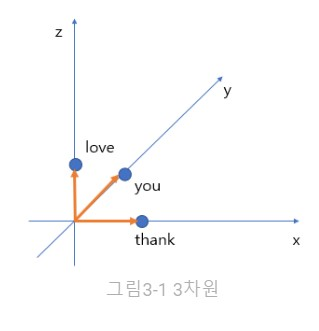

### 2-5. 분포 가설과 언어 모델
* 비슷한 위치(문맥) 내에 등장하는 단어들은 비슷란 의미를 가진다는 가설
```
예) (움트다)
봄이 되자 나뭇가지에는 파릇파릇 싹이 움트고 있었다
입사귀가 움트기 시작해도 물 올라가는 나무뿌리
```
* 목표 단어의 단어들, 즉 window 크기에 따라 정의 되는 문맥의 의미를 이용해 단어를 벡터로 표현하는 것이 목표
* 분포 가설이라는 가정 하에 만들어진 표현 방법응 분산 표현이라고 함
* PMI(Pointwise Mutual Information)
  * 분포 가설의 대표적인 통계량은 PMI아며, 두 확률변수 사이의 상관성을 계량하는 단위

  <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQDymO_xD-V_OPxd28vuMt63YWiUrx1XT3QhQ&usqp=CAU'>

  * 확률 변수가 완전히 독립인 경우에 값이 0이 되며, 독립이라는 말은 단어 x가 나타나는 것이 단어 y가 등장할 확률에 전혀 영향을 주지 않으며 반대로 단어 y의 등장이 단어 x에 영행을 주지 않는 것을 의미함
  * 단어 x가 등장할때 문맥 내에 단어 y와 같이 자주 등장한다면 PMI값이 커짐
  * 분포 가설을 활용하는 대표적인 모델은 2013년 Google의 [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781) 논문에서 발표된 Word2Vec이라는 단어 임베딩 기법
  



### 2-6. 단어가 어떤 순서로 쓰이는가
* 통계 기반 언어 모델
  - 언어 모델: 알련의 단어 토큰애 확률을 할당하는 모델
  - 단어의 등장 순서를 중요하게 고려하지 않았던 이전 가설들과 다르게 언어 모델은 단어 기퀀스 정보를 명시적으로 학습함
  - 단어가 n개 주어졌을 때 언어 모델은 n개의 단어가 동시에 나타날 확률을 반환
  - 문장은 어순을 고려하여 여러 단어로 이루어진 단어 시퀀스라고도 부르며, n개의 단어로 구성된 단어 시퀀스를 확률적으로 표현
* 딥러닝 기반 언어 모델
  - 통계 기반 언어 모델에서는 여전히 등장 빈도라는 통계량을 활영하여 확률을 추산했지만, 딥러닝 기반 언어 모델들이 등장하면서 딥러닝 모델들이 입력과 출력 사이의 관계를 유연하게 정의할 수 있게 되고 그 자체로 확률 모델로 동작 할 수 있음
    * MLM(Masked LAnguage Modeling)
      - 문장 중간에 마스크를 씌워서 해당 마스크에 어떤 단어가 올지 예측하는 과정에서 학습을 진행 문장 전페를 다 보고 중간에 있는 단어를 예픅하기 때문에 양방행 학습이 가능
      - 대표적으로 BERT 모델이 있음
    * Next Token Prediction
      - 주어진 단어 시퀀스를 가지고 다음 단어로 어떤 단어가 올지 예측하는 과정에서 학습
      - 단어를 순차적으로 입력 받은 뒤, 다음 단어를 맞춰야하기 떄문에 일방향 학습을 함
      - 대표적을 GPT, ELMo등
      


# 3. 텍스트 유사도
* 두 개의 자연어 텍스트가 얼마나 유사한지를 나타내는 방법
* 유사도를 정의하거나 판단하는 척도가 주관적이기 때문에, 이를 최대한 정량화하는 방법을 찾는 것이 중요함
* 자연어 처리 분야에서 자주 사용되는 유사도 픅정 방법
  - 유클리디안 거리 기반 유사도
  - 맨하탄 거리 기반 유사도
  - 코사인 유사도
  - 자카드 유사도
  - 문자열 간 유사도
  

### 3-1. 유클리디안 거리 기반 유사도
* 두 점 사이의 거리를 측정하는 유클리디안 거리를 사용하여 문서의 우사도를 구하는 방법으로 거리가 가까울수록 유사도가 높다고 판단함
* 자카드 유사도나 코사인 유사도만큼 유용하게 사용되는 방법은 아니나, 자연어 퍼리 분야뿐만 아니라 다른 분야에서도 범용적으로 사용되는 거리 측정 기법


### 3-2. 맨하탄 거리 기반 유사도
* 맨하탄 거리를 사용하여 문서의 유사도를 구하는 방법
* 유클리드 거리와 유사하나, 각 차원의 차를 제곱해서 새용하는 대신 절대값을 바로 합산함
* 항상 유클리드 거리보다 크거나 같음
* 다차원 공간상에서 두 좌표 간 최단거리를 구하는 방법이 아니다 보니 특별한 상황이 아니먄 잘 사용하지 않음


### 3-3.코사인 유사도
* 코사인 유사도는 두 새의 벡터값에서 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미
* 두 벡터의 방향이 완저히 동일한 경우에는 1의 값을 가지며, 90도의 각을 이루면 0, 180도로 반대의 방향을 가지면 -1의 값을 가짐
* -1이상 1이하의 값을 가지며 값이 1에 가까울수록 유사하는 것을 의미
* 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미하기 떄문에 자연어 내 유사도 계산에 더 적합함


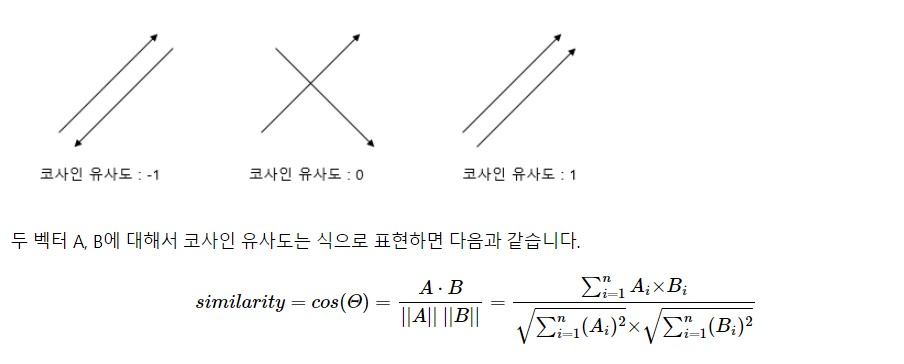

### 3-4. 자카드 유사도
* 두 문장을 각각 단어의 집합으로 만든 뒤 두 집합을 통해 유사도를 측정하는 방식
* 수치화된 벡터 없이 단어 집합 만으로 계산할 수 있음
* 두 집합의 교집합인 공통된 단어의 개수를 두 집합의 합집합, 전체 단어의 개수로 나누는것
* 전체 합집합 중 공통의 단어의 개수에 따라 0과 1사이의 값을 가지며 1에 가까울수록 유사도가 높음

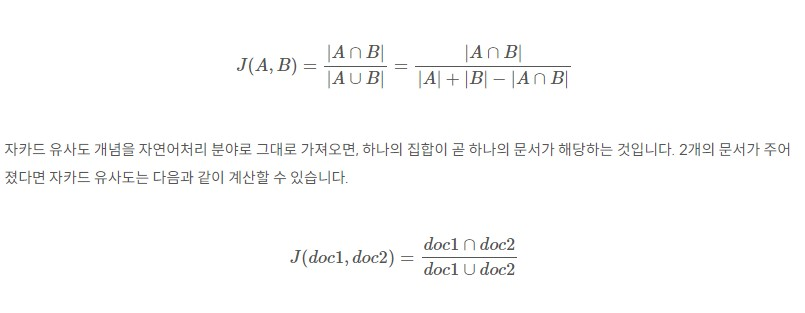

# 4. 유사도 측정 실습


* sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략)
* sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경)
* sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산
* sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산
* sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산

In [108]:
sen_1 = '오늘 점심에 배가 너무 고파서 밥을 너무 많이 먹었다.'
sen_2 = '오늘 점심에 배가 고파서 밥을 많이 먹었다.'
sen_3 = '오늘 배가 너무 고파서 점심에 밥을 너무 많이 먹었다.'
sen_4 = '오늘 점심에 배가 고파서 비행기를 많이 먹었다.'
sen_5 = '어제 저녁에 밥을 너무 많이 먹었더니 배가 부르다.'
sen_6 = '이따가 오후 7시에 출발하는 비행기가 3시간 연착 되었다고 하네요.'

In [109]:
training_documents = [sen_1, sen_2, sen_3, sen_4, sen_5, sen_6]

In [110]:
!pip install newspaper3k

In [111]:
from newspaper import Article

In [112]:
URL = 'https://v.daum.net/v/20230628102848646'
article = Article(URL, language='ko')

In [113]:
article.download()
article.parse()

news_title = article.title
news_context = article.text

print('title: ', news_title)
print('context: ', news_context)

title:  日 오염수 방류 사태가 부른 소금 품귀.. 해경 특별단속
context:  

일본 후쿠시마 원전 오염수 해양 방류가 초읽기에 들어가면서 소금 품귀 현상이 빚어지고 있는 가운데 해경이 단속 강화에 나섭니다.

제주지방해양경찰청은 그제(26일)부터 천일염 수급 안정화를 위해 도내 유통업체 등을 대상으로 천일염 불법 유통·판매 행위에 대한 특별단속을 실시하고 있다고 오늘(28일) 밝혔습니다.

중점 단속 대상은 수입산 국산 둔갑행위, 식용불가 소금 유통행위, 수입산과 혼합생산 행위, 유통이력 거짓표시 행위 등입니다.

해경 관계자는 "해양수산부, 지자체 등과 합동단속반을 구성, 가용인력을 총동원해 유통질서를 바로잡겠다"며 "천일염 불법행위 발견시 즉시 신고해주길 바란다"고 말했습니다.





JIBS 제주방송 김재연(Replaykim@jibs.co.kr) 기자


In [114]:
news_context = article.text.split('\n')

In [115]:
for text in news_context:
  print(text)



일본 후쿠시마 원전 오염수 해양 방류가 초읽기에 들어가면서 소금 품귀 현상이 빚어지고 있는 가운데 해경이 단속 강화에 나섭니다.

제주지방해양경찰청은 그제(26일)부터 천일염 수급 안정화를 위해 도내 유통업체 등을 대상으로 천일염 불법 유통·판매 행위에 대한 특별단속을 실시하고 있다고 오늘(28일) 밝혔습니다.

중점 단속 대상은 수입산 국산 둔갑행위, 식용불가 소금 유통행위, 수입산과 혼합생산 행위, 유통이력 거짓표시 행위 등입니다.

해경 관계자는 "해양수산부, 지자체 등과 합동단속반을 구성, 가용인력을 총동원해 유통질서를 바로잡겠다"며 "천일염 불법행위 발견시 즉시 신고해주길 바란다"고 말했습니다.





JIBS 제주방송 김재연(Replaykim@jibs.co.kr) 기자


In [116]:
!pip install kss

In [117]:
import kss

In [118]:
def sentence_seperator(processed_context):
  splited_context = []

  for text in processed_context:
    text = text.strip()
    if text:
      splited_text = kss.split_sentences(text)
      splited_context.extend(splited_text)

  return splited_context

In [119]:
splited_context = sentence_seperator(news_context)

for text in enumerate(splited_context):
  print(text)

(0, '일본 후쿠시마 원전 오염수 해양 방류가 초읽기에 들어가면서 소금 품귀 현상이 빚어지고 있는 가운데 해경이 단속 강화에 나섭니다.')
(1, '제주지방해양경찰청은 그제(26일)부터 천일염 수급 안정화를 위해 도내 유통업체 등을 대상으로 천일염 불법 유통·판매 행위에 대한 특별단속을 실시하고 있다고 오늘(28일) 밝혔습니다.')
(2, '중점 단속 대상은 수입산 국산 둔갑행위, 식용불가 소금 유통행위, 수입산과 혼합생산 행위, 유통이력 거짓표시 행위 등입니다.')
(3, '해경 관계자는 "해양수산부, 지자체 등과 합동단속반을 구성, 가용인력을 총동원해 유통질서를 바로잡겠다"며 "천일염 불법행위 발견시 즉시 신고해주길 바란다"고 말했습니다.')
(4, 'JIBS 제주방송 김재연(Replaykim@jibs.co.kr) 기자')


In [120]:
augmented_training_documents = training_documents + splited_context

In [121]:
for text in augmented_training_documents:
  print(text)

오늘 점심에 배가 너무 고파서 밥을 너무 많이 먹었다.
오늘 점심에 배가 고파서 밥을 많이 먹었다.
오늘 배가 너무 고파서 점심에 밥을 너무 많이 먹었다.
오늘 점심에 배가 고파서 비행기를 많이 먹었다.
어제 저녁에 밥을 너무 많이 먹었더니 배가 부르다.
이따가 오후 7시에 출발하는 비행기가 3시간 연착 되었다고 하네요.
일본 후쿠시마 원전 오염수 해양 방류가 초읽기에 들어가면서 소금 품귀 현상이 빚어지고 있는 가운데 해경이 단속 강화에 나섭니다.
제주지방해양경찰청은 그제(26일)부터 천일염 수급 안정화를 위해 도내 유통업체 등을 대상으로 천일염 불법 유통·판매 행위에 대한 특별단속을 실시하고 있다고 오늘(28일) 밝혔습니다.
중점 단속 대상은 수입산 국산 둔갑행위, 식용불가 소금 유통행위, 수입산과 혼합생산 행위, 유통이력 거짓표시 행위 등입니다.
해경 관계자는 "해양수산부, 지자체 등과 합동단속반을 구성, 가용인력을 총동원해 유통질서를 바로잡겠다"며 "천일염 불법행위 발견시 즉시 신고해주길 바란다"고 말했습니다.
JIBS 제주방송 김재연(Replaykim@jibs.co.kr) 기자


In [122]:
# Bag of Words 기반 문서-단어 행렬을 활용한 문장 간 유사도 측정
from sklearn.feature_extraction.text import CountVectorizer


In [123]:
bow_vectorizer = CountVectorizer()
bow_vectorizer.fit(augmented_training_documents)

CountVectorizer()

In [124]:
word_indxes = bow_vectorizer.vocabulary_

for key, idx in sorted(word_indxes.items()):
  print(f'{key}: {idx}')

26일: 0
28일: 1
3시간: 2
7시에: 3
co: 4
jibs: 5
kr: 6
replaykim: 7
가용인력을: 8
가운데: 9
강화에: 10
거짓표시: 11
고파서: 12
관계자는: 13
구성: 14
국산: 15
그제: 16
기자: 17
김재연: 18
나섭니다: 19
너무: 20
단속: 21
대상으로: 22
대상은: 23
대한: 24
도내: 25
되었다고: 26
둔갑행위: 27
들어가면서: 28
등과: 29
등을: 30
등입니다: 31
많이: 32
말했습니다: 33
먹었다: 34
먹었더니: 35
바란다: 36
바로잡겠다: 37
발견시: 38
밝혔습니다: 39
밥을: 40
방류가: 41
배가: 42
부르다: 43
부터: 44
불법: 45
불법행위: 46
비행기가: 47
비행기를: 48
빚어지고: 49
소금: 50
수급: 51
수입산: 52
수입산과: 53
식용불가: 54
신고해주길: 55
실시하고: 56
안정화를: 57
어제: 58
연착: 59
오늘: 60
오염수: 61
오후: 62
원전: 63
위해: 64
유통: 65
유통업체: 66
유통이력: 67
유통질서를: 68
유통행위: 69
이따가: 70
일본: 71
있는: 72
있다고: 73
저녁에: 74
점심에: 75
제주방송: 76
제주지방해양경찰청은: 77
중점: 78
즉시: 79
지자체: 80
천일염: 81
초읽기에: 82
총동원해: 83
출발하는: 84
특별단속을: 85
판매: 86
품귀: 87
하네요: 88
합동단속반을: 89
해경: 90
해경이: 91
해양: 92
해양수산부: 93
행위: 94
행위에: 95
현상이: 96
혼합생산: 97
후쿠시마: 98


In [125]:
# 각 단어별로 컬럼으로 배치
# 각 문자별로 나열
import pandas as pd

In [126]:
result = []
vocab = list(word_indxes.keys())

for i in range(len(training_documents)):
  result.append([])
  d = training_documents[i]
  for j in range(len(vocab)):
    target = vocab[j]
    result[-1].append(d.count(target))

tf = pd.DataFrame(result, columns=vocab)
tf

,오늘,점심에,배가,너무,고파서,밥을,많이,먹었다,비행기를,어제,...,신고해주길,바란다,말했습니다,jibs,제주방송,김재연,replaykim,co,kr,기자
0,1,1,1,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
result = []
vocab = list(word_indxes.keys())

for i in range(len(augmented_training_documents)):
  result.append([])
  d = augmented_training_documents[i]
  for j in range(len(vocab)):
    target = vocab[j]
    result[-1].append(d.count(target))

tf = pd.DataFrame(result, columns=vocab)
tf

,오늘,점심에,배가,너무,고파서,밥을,많이,먹었다,비행기를,어제,...,신고해주길,바란다,말했습니다,jibs,제주방송,김재연,replaykim,co,kr,기자
0,1,1,1,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [128]:
# 유사도를 측정할 문장들을 문장-단어 행렬 기반 임베딩으로 변환
bow_vector_sen_1 = bow_vectorizer.transform([sen_1]).toarray()[0]
bow_vector_sen_2 = bow_vectorizer.transform([sen_2]).toarray()[0]
bow_vector_sen_3 = bow_vectorizer.transform([sen_3]).toarray()[0]
bow_vector_sen_4 = bow_vectorizer.transform([sen_4]).toarray()[0]
bow_vector_sen_5 = bow_vectorizer.transform([sen_5]).toarray()[0]
bow_vector_sen_6 = bow_vectorizer.transform([sen_6]).toarray()[0]

In [129]:
print(bow_vector_sen_1)
print(bow_vector_sen_2)
print(bow_vector_sen_3)
print(bow_vector_sen_4)
print(bow_vector_sen_5)
print(bow_vector_sen_6)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [130]:
# 코사인 기반 유사도 계싼을 위한 함수를 정의
# 분모 정규분포
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [131]:
def cos_sim(A, B):
  return dot(A, B) / (norm(A) * norm(B))

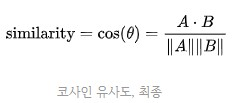

* sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략)
* sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경)
* sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산
* sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산
* sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산

```
* sen_1 = '오늘 점심에 배가 너무 고파서 밥을 너무 많이 먹었다.'
* sen_2 = '오늘 점심에 배가 고파서 밥을 많이 먹었다.'
* sen_3 = '오늘 배가 너무 고파서 점심에 밥을 너무 많이 먹었다.'
* sen_4 = '오늘 점심에 배가 고파서 비행기를 많이 먹었다.'
* sen_5 = '어제 저녁에 밥을 너무 많이 먹었더니 배가 부르다.'
* sen_6 = '이따가 오후 7시에 출발하는 비행기가 3시간 연착 되었다고 하네요.'
```

In [132]:
print(f'sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략): {cos_sim(bow_vector_sen_1, bow_vector_sen_2)}')
print(f'sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경): {cos_sim(bow_vector_sen_1, bow_vector_sen_3)}')
print(f'sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: {cos_sim(bow_vector_sen_2, bow_vector_sen_4)}')
# 유사도 측정에 있어서 빈도수를 기준으로 확인해서 전혀 다른 의미라도 빈도수가 같으면 유사도가 높게 측정된다
print(f'sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: {cos_sim(bow_vector_sen_1, bow_vector_sen_5)}')

print(f'sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산: {cos_sim(bow_vector_sen_1, bow_vector_sen_6)}')

sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략): 0.7977240352174656
sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경): 1.0
sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: 0.857142857142857
sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: 0.5330017908890261
sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산: 0.0


In [133]:
# TG_IDF기반 문서-단어 행렬을 활용한 문장 간 유사도 측정
from sklearn.feature_extraction.text import TfidfVectorizer

In [134]:
tfidfv = TfidfVectorizer().fit(augmented_training_documents)

In [135]:
for key, idx in sorted(tfidfv.vocabulary_.items()):
  print(f'{key}: {idx}')

26일: 0
28일: 1
3시간: 2
7시에: 3
co: 4
jibs: 5
kr: 6
replaykim: 7
가용인력을: 8
가운데: 9
강화에: 10
거짓표시: 11
고파서: 12
관계자는: 13
구성: 14
국산: 15
그제: 16
기자: 17
김재연: 18
나섭니다: 19
너무: 20
단속: 21
대상으로: 22
대상은: 23
대한: 24
도내: 25
되었다고: 26
둔갑행위: 27
들어가면서: 28
등과: 29
등을: 30
등입니다: 31
많이: 32
말했습니다: 33
먹었다: 34
먹었더니: 35
바란다: 36
바로잡겠다: 37
발견시: 38
밝혔습니다: 39
밥을: 40
방류가: 41
배가: 42
부르다: 43
부터: 44
불법: 45
불법행위: 46
비행기가: 47
비행기를: 48
빚어지고: 49
소금: 50
수급: 51
수입산: 52
수입산과: 53
식용불가: 54
신고해주길: 55
실시하고: 56
안정화를: 57
어제: 58
연착: 59
오늘: 60
오염수: 61
오후: 62
원전: 63
위해: 64
유통: 65
유통업체: 66
유통이력: 67
유통질서를: 68
유통행위: 69
이따가: 70
일본: 71
있는: 72
있다고: 73
저녁에: 74
점심에: 75
제주방송: 76
제주지방해양경찰청은: 77
중점: 78
즉시: 79
지자체: 80
천일염: 81
초읽기에: 82
총동원해: 83
출발하는: 84
특별단속을: 85
판매: 86
품귀: 87
하네요: 88
합동단속반을: 89
해경: 90
해경이: 91
해양: 92
해양수산부: 93
행위: 94
행위에: 95
현상이: 96
혼합생산: 97
후쿠시마: 98


In [136]:
sk_tf_idf = tfidfv.transform(augmented_training_documents).toarray()
print(sk_tf_idf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.23931088 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [137]:
# TF-IDF 행렬에서 얻어지는 유사도의 값을 0 ~ 1로 스케일링학 위해 L! 정규화를 진행
def l1_normalize(v):
  norm = np.sum(v)
  return v / norm

In [138]:
fidf_vectorizer = TfidfVectorizer()
fidf_matrix_l1 = fidf_vectorizer.fit_transform(augmented_training_documents)
fidf_norm_l1 = l1_normalize(fidf_matrix_l1)
fidf_norm_l1

<11x99 sparse matrix of type '<class 'numpy.float64'>'
	with 128 stored elements in Compressed Sparse Row format>

In [139]:
tf_sen_1 = fidf_norm_l1[0:1]
tf_sen_2 = fidf_norm_l1[1:2]
tf_sen_3 = fidf_norm_l1[2:3]
tf_sen_4 = fidf_norm_l1[3:4]
tf_sen_5 = fidf_norm_l1[4:5]
tf_sen_6 = fidf_norm_l1[5:6]
tf_sen_1

<1x99 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [140]:
tf_sen_1.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00825479, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0184739 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00745231, 0.        , 0.00825479,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00825479, 0.        , 0.00745231, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00745231, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [141]:
# 유클리디안 거리 기반 유사도 측정
from sklearn.metrics.pairwise import euclidean_distances

In [142]:
euclidean_distances(tf_sen_1, tf_sen_2)

array([[0.01974862]])

In [143]:
def euclidean_distances_value(vec_1, vec_2):
  return round(euclidean_distances(vec_1,vec_2)[0][0], 3)

In [144]:
euclidean_distances_value(tf_sen_1, tf_sen_2)


0.02

In [145]:
print(f'sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략): {euclidean_distances_value(tf_sen_1, tf_sen_2)}')
print(f'sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경): {euclidean_distances_value(tf_sen_1, tf_sen_3)}')
print(f'sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: {euclidean_distances_value(tf_sen_2, tf_sen_4)}')
# 유사도 측정에 있어서 빈도수를 기준으로 확인해서 전혀 다른 의미라도 빈도수가 같으면 유사도가 높게 측정된다
print(f'sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: {euclidean_distances_value(tf_sen_1, tf_sen_5)}')

print(f'sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산: {euclidean_distances_value(tf_sen_1, tf_sen_6)}')

#거리 계산이기때문에 0에 가까울수록 유사한거

sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략): 0.02
sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경): 0.0
sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: 0.019
sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: 0.03
sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산: 0.04


In [183]:
from sklearn.metrics.pairwise import manhattan_distances, cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances

In [184]:
# 맨해튼 거리 기반 유사도 측정
def manhattan_distances_value(vec_1, vec_2):
    return round(manhattan_distances(vec_1, vec_2)[0][0], 3)

In [185]:
print(f'의미가 유사한 문장 간 유사도 계산(조사 생략): {manhattan_distances_value(tf_sen_1, tf_sen_2)}')
print(f'의미가 유사한 문장 간 유사도 계산(순서 변경): {manhattan_distances_value(tf_sen_1, tf_sen_3)}')
print(f'문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: {manhattan_distances_value(tf_sen_2, tf_sen_4)}')
print(f'의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: {manhattan_distances_value(tf_sen_1, tf_sen_5)}')
print(f'의미가 서로 다른 문장 간 유사도 계산: {manhattan_distances_value(tf_sen_1, tf_sen_6)}')

의미가 유사한 문장 간 유사도 계산(조사 생략): 0.037
의미가 유사한 문장 간 유사도 계산(순서 변경): 0.0
문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: 0.031
의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: 0.09
의미가 서로 다른 문장 간 유사도 계산: 0.158


In [158]:
# 코사인 거리 유사도 측
def cos_sim(vec_1, vec_2):
    return dot(vec_1, vec_2) / (norm(vec_1) * norm(vec_2))

In [159]:
tf_sen_1_dense = tf_sen_1.toarray().reshape(-1)
tf_sen_2_dense = tf_sen_2.toarray().reshape(-1)
tf_sen_3_dense = tf_sen_3.toarray().reshape(-1)
tf_sen_4_dense = tf_sen_4.toarray().reshape(-1)
tf_sen_5_dense = tf_sen_5.toarray().reshape(-1)
tf_sen_6_dense = tf_sen_6.toarray().reshape(-1)

In [155]:
print(f'sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략): {cos_sim(tf_sen_1_dense, tf_sen_2_dense)}')
print(f'sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경): {cos_sim(tf_sen_1_dense, tf_sen_3_dense)}')
print(f'sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: {cos_sim(tf_sen_2_dense, tf_sen_4_dense)}')
print(f'sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: {cos_sim(tf_sen_1_dense, tf_sen_5_dense)}')
print(f'sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산: {cos_sim(tf_sen_1_dense, tf_sen_6_dense)}')

sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략): 0.7501428911510699
sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경): 1.0000000000000002
sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: 0.7749072749969016
sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: 0.4249438778855682
sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산: 0.0


In [164]:
# 언어 모델을 활용한 문장 간 유사도 측정
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.7 MB/s eta 0:00:00


In [165]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer

In [166]:
MODEL_NAME = 'bert-base-multilingual-cased'

model = AutoModel.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [171]:
bert_sen_1 = tokenizer(sen_1, return_tensors='pt')
bert_sen_2 = tokenizer(sen_2, return_tensors='pt')
bert_sen_3 = tokenizer(sen_3, return_tensors='pt')
bert_sen_4 = tokenizer(sen_4, return_tensors='pt')
bert_sen_5 = tokenizer(sen_5, return_tensors='pt')
bert_sen_6 = tokenizer(sen_6, return_tensors='pt')

In [175]:
sen_1_outputs = model(**bert_sen_1) #딕셔너리 형태로 넣는다
sen_1_pooler_output = sen_1_outputs.pooler_output
#sen_1_pooler_output  각 임베딩된 문자열의 기울기(가중치)

sen_2_outputs = model(**bert_sen_2) #딕셔너리 형태로 넣는다
sen_2_pooler_output = sen_2_outputs.pooler_output

sen_3_outputs = model(**bert_sen_3) #딕셔너리 형태로 넣는다
sen_3_pooler_output = sen_3_outputs.pooler_output

sen_4_outputs = model(**bert_sen_4) #딕셔너리 형태로 넣는다
sen_4_pooler_output = sen_4_outputs.pooler_output

sen_5_outputs = model(**bert_sen_5) #딕셔너리 형태로 넣는다
sen_5_pooler_output = sen_5_outputs.pooler_output

sen_6_outputs = model(**bert_sen_6) #딕셔너리 형태로 넣는다
sen_6_pooler_output = sen_6_outputs.pooler_output

In [176]:
from torch import nn

In [178]:
cos_sim = nn.CosineSimilarity(dim=1, eps=1e-6)

In [180]:
print(f'sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략): {cos_sim(sen_1_pooler_output, sen_2_pooler_output)}')
print(f'sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경): {cos_sim(sen_1_pooler_output, sen_3_pooler_output)}')
print(f'sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: {cos_sim(sen_2_pooler_output, sen_4_pooler_output)}')
print(f'sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: {cos_sim(sen_1_pooler_output,sen_5_pooler_output)}')
print(f'sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산: {cos_sim(sen_1_pooler_output, sen_6_pooler_output)}')
# 한글을 완벽하게 이해 못하고 더 많은 학습 데이터 필요하다 또한 유사도의 차이가 적지만 그 작은 수치가 실제 데이터와 많이 차이가 난다

sen_1, sen_2 : 의미가 유사한 문장 간 유사도 계산(조사 생략): tensor([0.9901], grad_fn=<SumBackward1>)
sen_1, sen_3 : 의미가 유사한 문장 간 유사도 계산(순서 변경): tensor([0.9972], grad_fn=<SumBackward1>)
sen_2, sen_4 : 문장 내 단어를 임의의 단어로 치환한 문장과 원 문장 간 유사도 계산: tensor([0.9916], grad_fn=<SumBackward1>)
sen_1, sen_5 : 의미는 다르지만 비슷한 주제를 가지는 문장 간 유사도 계산: tensor([0.9744], grad_fn=<SumBackward1>)
sen_1, sen_6 : 의미가 서로 다른 문장 간 유사도 계산: tensor([0.9533], grad_fn=<SumBackward1>)
